In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import  r2_score, make_scorer


In [4]:
data = pd.read_csv('data/ChemicalManufacturingProcess/ChemicalManufacturingProcess.csv', index_col=0)
data.head()

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
1,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,0.019,0.5,3.0,7.2,NaN,NaN,11.6,3.0,1.8,2.4
2,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.019,2.0,2.0,7.2,0.1,0.15,11.1,0.9,1.9,2.2
3,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,0.7,2.0,7.2,0.0,0.00,12.0,1.0,1.8,2.3
4,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,1.2,2.0,7.2,0.0,0.00,10.6,1.1,1.8,2.1
5,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,0.017,0.2,2.0,7.3,0.0,0.00,11.0,1.1,1.7,2.1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 1 to 176
Data columns (total 58 columns):
Yield                     176 non-null float64
BiologicalMaterial01      176 non-null float64
BiologicalMaterial02      176 non-null float64
BiologicalMaterial03      176 non-null float64
BiologicalMaterial04      176 non-null float64
BiologicalMaterial05      176 non-null float64
BiologicalMaterial06      176 non-null float64
BiologicalMaterial07      176 non-null float64
BiologicalMaterial08      176 non-null float64
BiologicalMaterial09      176 non-null float64
BiologicalMaterial10      176 non-null float64
BiologicalMaterial11      176 non-null float64
BiologicalMaterial12      176 non-null float64
ManufacturingProcess01    175 non-null float64
ManufacturingProcess02    173 non-null float64
ManufacturingProcess03    161 non-null float64
ManufacturingProcess04    175 non-null float64
ManufacturingProcess05    175 non-null float64
ManufacturingProcess06    174 non-null float64
Ma

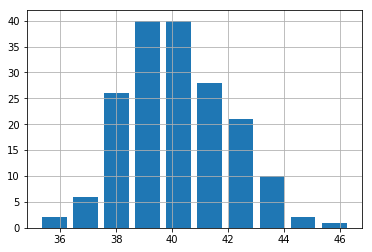

In [8]:
data.Yield.hist(rwidth=.8)

In [31]:
X = data.drop(columns='Yield')
y = data['Yield']

X.shape, y.shape

((176, 57), (176,))

In [68]:
pls_pipe = make_pipeline(SimpleImputer(), 
                         #StandardScaler(),
                         PLSRegression(scale=True))

pls_params = {'plsregression__n_components': np.arange(1, 11)}

cv = RepeatedKFold(n_repeats=5, n_splits=10, random_state=123)

In [69]:
pls_grid = GridSearchCV(pls_pipe, pls_params, cv=cv, scoring=make_scorer(r2_score), 
                        return_train_score=True, n_jobs=4, verbose=2)

In [70]:
pls_grid.fit(X, y)

Fitting 50 folds for each of 10 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.7s finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x000001CB0C7B97F0>,
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('simpleimputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)), ('plsregression', PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06))]),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'plsregression__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(r2_score), verbose=2)

In [71]:
pls_df = pd.DataFrame(pls_grid.cv_results_)

In [72]:
pls_df.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_plsregression__n_components,params,rank_test_score,split0_test_score,split0_train_score,split10_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.006569,0.002318,0.188874,0.474501,1,{'plsregression__n_components': 1},2,0.235318,0.486634,0.681502,...,0.181920,0.464743,0.496199,0.482307,0.330723,0.476094,0.006078,0.004627,0.539667,0.017327
1,0.005224,0.003954,-0.988857,0.629785,2,{'plsregression__n_components': 2},4,0.322326,0.649848,0.722332,...,-6.962948,0.608105,0.210948,0.657682,0.537750,0.621278,0.006834,0.006082,3.306654,0.017187
2,0.008161,0.002853,0.282817,0.684405,3,{'plsregression__n_components': 3},1,0.326114,0.699419,0.755215,...,-0.456788,0.680203,0.006193,0.707977,0.716496,0.678591,0.007999,0.005859,0.628475,0.013796
3,0.008376,0.001861,-0.274852,0.707804,4,{'plsregression__n_components': 4},3,0.253823,0.722966,0.753290,...,-11.052409,0.703465,0.148035,0.730159,0.625494,0.705999,0.007793,0.004529,2.594256,0.013180
4,0.009932,0.001787,-1.819060,0.729699,5,{'plsregression__n_components': 5},5,0.307845,0.745451,0.724211,...,-34.192437,0.725520,0.146695,0.751506,0.590859,0.732650,0.007439,0.004248,7.686533,0.012556


In [73]:
pls_df['SE_score'] = pls_df['std_test_score'] / np.sqrt(50)

In [74]:
results = (pls_df[['param_plsregression__n_components', 'mean_test_score', 'SE_score']]
               .set_index('param_plsregression__n_components')
          )
results

,mean_test_score,SE_score
param_plsregression__n_components,,
1,0.188874,0.076320
2,-0.988857,0.467631
3,0.282817,0.088880
4,-0.274852,0.366883
5,-1.819060,1.087040
6,-2.125494,1.262837
7,-2.898553,1.617604
8,-3.183805,1.767745
9,-3.903904,1.966082


In [17]:
r2_by_components = np.array([.444, .5, .533,.545,.542,.537,.534,.534,.52,.507])
r2_se_by_components = np.array([.0272,.0298,.0302,.0308,.0322,.0327,.0333,.033,.0326,.0324])

In [20]:
best_r2 = r2_by_components.max()
within_1se_r2 = best_r2 - r2_se_by_components[best_r2.argmax()]
within_1se_r2

0.5178

In [25]:
np.argmax(r2_by_components > within_1se_r2) + 1

3

In [27]:
np.argmax((((r2_by_components - best_r2)/best_r2) * -100) < 10) + 1

2